<a href="https://colab.research.google.com/github/Mandloi1/projectwork/blob/master/Mobilenet_best_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras. metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [9]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPUs Available:  1


In [10]:
train_path = "/content/drive/My Drive/NEU_New/train"
valid_path = "/content/drive/My Drive/NEU_New/valid"
test_path =  "/content/drive/My Drive/NEU_New/test"

In [11]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1620 images belonging to 6 classes.
Found 120 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


In [12]:
assert train_batches.n == 1620
assert valid_batches.n == 120
assert test_batches.n == 60
assert train_batches.num_classes == valid_batches.num_classes ==test_batches.num_classes == 6

In [13]:
mobile =tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 2s 0us/step


In [14]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [16]:
x = mobile.layers[-6].output
output = Dense(units=6, activation='softmax')(x)

In [18]:
model = keras.Model(inputs=mobile.input, outputs=output)

In [19]:
for layer in model.layers[:-23]:
  layer.trainable = False

In [20]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [21]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
print('Compiled!')

Compiled!


In [23]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=30, verbose=2)

Epoch 1/30
162/162 - 1269s - loss: 0.1100 - accuracy: 0.9716 - val_loss: 0.0477 - val_accuracy: 0.9917
Epoch 2/30
162/162 - 6s - loss: 0.0350 - accuracy: 0.9889 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 3/30
162/162 - 6s - loss: 0.0196 - accuracy: 0.9920 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 4/30
162/162 - 6s - loss: 0.0102 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 5/30
162/162 - 6s - loss: 0.0163 - accuracy: 0.9944 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 6/30
162/162 - 6s - loss: 0.0120 - accuracy: 0.9975 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 7/30
162/162 - 6s - loss: 0.0105 - accuracy: 0.9988 - val_loss: 7.5224e-04 - val_accuracy: 1.0000
Epoch 8/30
162/162 - 6s - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 9/30
162/162 - 6s - loss: 0.0054 - accuracy: 0.9988 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 10/30
162/162 - 6s - loss: 0.0070 - accuracy: 0.9988 - val_loss: 0.0075 - val_accuracy:

In [24]:
test_labels = test_batches.classes

In [25]:
predictions = model.predict(x=test_batches, verbose=0)

In [ ]:
#np.round(predictions)

In [26]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [27]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
    else:
       print("Confusion matrix, without normalization ")
    
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')

In [28]:
test_batches.class_indices

{'Crazing': 0,
 'Inclusion': 1,
 'Patches': 2,
 'Pitted': 3,
 'Rolled': 4,
 'Scratches': 5}

Confusion matrix, without normalization 
[[10  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 10]]


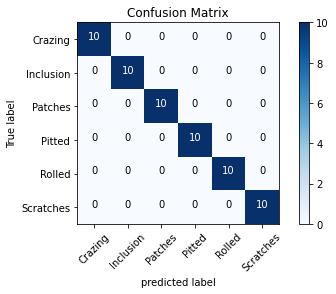

In [29]:
cm_plot_labels = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')